In [0]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [0]:
mnist

Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f34300d29b0>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f33d9d55710>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f33d9d55d68>)

In [0]:
x = tf.placeholder( tf.float32, [None, 784] )

Y = tf.placeholder( tf.float32, [None, 10] )  # Here Y is original label

# We want to be able to input any number of MNIST images,  each flattened into a 784-dimensional vector. 
# We represent this as a 2-D tensor of floating-point numbers, with a shape [None, 784]. 

# Type 32 bit float values has 2 dimensions one is 784 and the other is None ( idk what it will be ) i,e; no. of cols = 784, no. of datapoints = unknown

# dtype (tf.float32) : The type of elements in the tensor to be fed.
# shape ([None, 784]): The shape of the tensor to be fed (optional). If the shape is not specified, you can feed a tensor of any shape.

# Inserts a placeholder for a tensor that will be always fed.
# Important: This tensor will produce an error if evaluated. Its value must be fed using the feed_dict optional argument to Session.run(), Tensor.eval(), or Operation.run().

# Ref : https://www.tensorflow.org/api_docs/python/tf/placeholder

In [0]:
keepProbTr = tf.placeholder( tf.float32 )
# keepProbTr: we will be using these placeholders when we use dropouts, while training model

keepProbTe = tf.placeholder( tf.float32 )
# keepProbTe: we will be using these placeholders when we use dropouts, while testing model

In [0]:
# Network Parameters Initialization

hidden1 = 512   # 1st layer number of neurons
hidden2 = 128   # 2nd layer number of neurons
input = 784     # MNIST data input (img shape: 28*28)
classes = 10    # MNIST total classes (0-9 digits)

# Layers =>  784 - 512 - 128 - (softmax) - 10

### Weight Initialization

In [0]:
# Outputs random values from a normal distribution mean=0 std=1

# If we sample weights from a normal distribution N( 0, σ ) we satisfy this condition with σ = √ ( 2 / (ni+ni+1) ) 
# h1 =>  σ = √ ( 2 / ( fan_in + fan_out + 1) ) = 0.039  => N(0,σ) = N(0,0.039)
# h2 =>  σ = √ ( 2 / ( fan_in + fan_out + 1) ) = 0.055  => N(0,σ) = N(0,0.055)
# out =>  σ = √ ( 2 / ( fan_in + fan_out + 1) ) = 0.120  => N(0,σ) = N(0,0.120)

# for h1 : input = 784 , hidden1 = 512  => fan_in = 784, fan_out = 512  =>  σ = √ ( 2 / ( 784 + 512 + 1) ) 
# => σ = √ ( 2 / ( 1297 ) )   => σ = √ ( 0.00154 )   => 0.3924  Similary we can Calc for 'h2' and 'out' 

# SGD: Xavier/Glorot Normal initialization.

weightsSGD = {
    'h1': tf.Variable( tf.random_normal( [ input, hidden1 ], stddev = 0.039, mean = 0 )),    # 784x512 => sqrt( 2 / (784+512) ) = 0.039 # see formula of h1 above
    'h2': tf.Variable( tf.random_normal( [ hidden1, hidden2 ], stddev = 0.055, mean = 0 )),  # 512x128 => sqrt( 2 / (512+128) ) = 0.055
    'out': tf.Variable( tf.random_normal( [ hidden2, classes ], stddev = 0.120, mean = 0))  # 128x10
}

# These weights are for when i am using Sigmoid Activation Unit

# tf.random_normal : tf.random_normal( shape, mean=0.0, stddev=1.0, dtype=tf.dtypes.float32, seed=None, name=None )
# Returns a tensor of the specified shape filled with random normal values.

# Ref : https://arxiv.org/pdf/1707.09725.pdf#page=95
# Ref : https://www.tensorflow.org/api_docs/python/tf/random_normal

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
print( weightsSGD )
type( weightsSGD )

{'h1': <tf.Variable 'Variable:0' shape=(784, 512) dtype=float32_ref>, 'h2': <tf.Variable 'Variable_1:0' shape=(512, 128) dtype=float32_ref>, 'out': <tf.Variable 'Variable_2:0' shape=(128, 10) dtype=float32_ref>}


dict

In [0]:
# Weight initialization

# for relu lates
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ = √ ( 2 / ni ). 
# h1 =>  σ = √ ( 2 / ( fan_in + 1 ) ) = 0.062  => N(0,σ) = N(0,0.062)
# h2 =>  σ = √ ( 2 / ( fan_in + 1 ) ) = 0.125  => N(0,σ) = N(0,0.125)
# out =>  σ = √ ( 2 / ( fan_in + 1 ) ) = 0.120  => N(0,σ) = N(0,0.120)

# He Normal initialization

weightsRELU = {
    'h1': tf.Variable( tf.random_normal( [ input, hidden1 ], stddev = 0.062, mean = 0 )),    #784x512
    'h2': tf.Variable( tf.random_normal( [ hidden1, hidden2 ], stddev = 0.125, mean = 0 )), #512x128
    'out': tf.Variable( tf.random_normal( [ hidden2, classes ], stddev = 0.120, mean = 0 ))  #128x10
}

# These weights are for when i am using RELU Activation Unit

biases = {
    'b1': tf.Variable( tf.random_normal( [ hidden1 ] )),             #512x1
    'b2': tf.Variable( tf.random_normal( [ hidden2 ] )),             #128x1
    'out': tf.Variable( tf.random_normal( [ classes ] ))              #10x1
}

# tf.random_normal : tf.random_normal( shape, mean=0.0, stddev=1.0, dtype=tf.dtypes.float32, seed=None, name=None )
# Returns a tensor of the specified shape filled with random normal values.

# Ref : https://arxiv.org/pdf/1707.09725.pdf#page=95


In [0]:
# Initializing Parameters

epochs = 50
lr = 0.001 # Learning rate
batch = 100
step = 0

In [0]:
# Function to update the plots for each epoch and error

import matplotlib.pyplot as plt
import numpy as np

def plot( x, y, Y, ax, ticks, title ):
  
    ax.plot(x, y, 'b', label = " Train Loss ")
    ax.plot(x, Y, 'r', label = " Test Loss ")
    
    if len(x)==1:
        plt.legend()
        plt.title(title)
    
    plt.yticks(ticks)
    fig.canvas.draw()
    
# Ref : https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# Ref : https://stackoverflow.com/a/14434334

## Model 1 : Sigmoid Activation

input (784) - sigmoid(512) - sigmoid(128) -  softmax(output 10)


In [0]:
# Here weights is a  matrix, x is a vector and b is also a vector
# Hidden layer with Sigmoid activation

def MLP( x, weights, biases ):
    
    print( ' x: ', x.get_shape(), ' W[h1]: ', weights['h1'].get_shape(), ' b[h1]: ', biases['b1'].get_shape() )        
    
  # Layer 1
    # ( x * weights['h1'] ) + biases['b1']   =>    ( w.T * x ) + b
    # Then we apply sigmoid on top of w.T * x + b

    layer1 = tf.add( tf.matmul( x, weights['h1'] ), biases['b1'] ) 
    layer1 = tf.nn.sigmoid( layer1 )
    print(' layer1 : ', layer1.get_shape(), ' W[h2] : ', weights['h2'].get_shape(), ' b[h2] : ', biases['b2'].get_shape())        
    
  # Layer 2
    # ( layer1 * weights['h2'] ) + biases['b2']
    # Then we apply sigmoid on top of w.T * x + b

    layer2 = tf.add( tf.matmul( layer1, weights['h2'] ), biases['b2'] )  
    layer2 = tf.nn.sigmoid(layer2)
    print(' layer2 : ', layer2.get_shape(), ' W[out] : ', weights['out'].get_shape(), ' b3 : ', biases['out'].get_shape())        
    
  # Output layer with Sigmoid activation
    # ( layer2 * weights['out'] ) + biases['out']  
    
    outlayer = tf.matmul( layer2, weights['out'] ) + biases['out']  
    outlayer = tf.nn.sigmoid( outlayer )   # This sigmoid is softmax
    print(' outlayer : ', outlayer.get_shape())

    return outlayer
  
# Use tf.matmul instead of "*" because tf.matmul can change it's dimensions on the fly (broadcast)

# Ref :  https://leonardoaraujosantos.gitbooks.io/artificial-inteligence/content/multi_layer_perceptron_mnist.html


In [0]:
ySGD  = MLP( x, weightsSGD, biases )  # SGD for sigmoid activation units

costSGD = tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits( logits = ySGD, labels = Y ))

# tf.reduce_mean computes the mean over all the examples in the batch.
# reduce_mean sums and averages all the values in the tensor 

# softmax_cross_entropy_with_logits : A Tensor that contains the softmax cross entropy loss. 

optimizerADAM = tf.train.AdamOptimizer( learning_rate = lr ).minimize( costSGD )
optimizerSGD  = tf.train.GradientDescentOptimizer( learning_rate = lr ).minimize( costSGD )

# means Training needs to be done with the optimizer defined which minimizes costSGD

# Ref : https://www.tensorflow.org/api_docs/python/tf/nn/softmax_cross_entropy_with_logits
# Ref : https://www.tensorflow.org/versions/r1.2/api_guides/python/train#Optimizers 

 x:  (?, 784)  W[h1]:  (784, 512)  b[h1]:  (512,)
 layer1 :  (?, 512)  W[h2] :  (512, 128)  b[h2] :  (128,)
 layer2 :  (?, 128)  W[out] :  (128, 10)  b3 :  (10,)
 outlayer :  (?, 10)
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



### Model 1 with ADAM Optimizer


In [0]:
with tf.Session() as session :
  
    # We first have to create an operation to initialize the variables we created

    tf.global_variables_initializer().run()
    # Returns an Op that initializes global variables in the graph.
    
    fig, ax = plt.subplots( 1, 1, figsize=(15, 5) )
    ax.set_xlabel('epoch')
    ax.set_ylabel('Softmax Cross Entropy loss')
    
    xs, ytrs, ytes = [], [], []
    
    for epoch in range( epochs ):
        
        trAvgCost = 0. # Average Train Cost/ Loss
        teAvgCost = 0.
        
        tbatch = int( mnist.train.num_examples / batch ) # conisder it as mini batch
        # equals to no. of data points / batch

        # Loop over all batches
        for i in range( tbatch ):
          
            batchX, batchY = mnist.train.next_batch( batch )  # returns a minibatch of batch no. of xi's and yi's 
            
            # Here we use AdamOptimizer
            # x, Y are the input parameters on which the models gets trained ( x, Y are placeholders )
            
            # Here c: corresponds to the parameter costSGD
            # w : correspondse to the parameter weightsSGD
            
            _, c, w = session.run( [ optimizerADAM, costSGD, weightsSGD ], feed_dict = { x: batchX, Y: batchY } )
            trAvgCost += c / tbatch
            
            c = session.run( costSGD, feed_dict = { x: mnist.test.images, Y: mnist.test.labels})
            teAvgCost += c / tbatch
            
            # session.run() : returns parameter values based on the input parameters
            # feed_dict: A dictionary that maps Tensor objects to feed values. 

            # c = session.run() : return the cost after every bath during train
            # w = session.run() : return the weights that are modified after every batch through Back propagation
            
            # w is dict w = {'h1': updated h1 weight vector after the current batch,
            #                'h2': updated h2 weight vector after the current batch, 
            #                'out': updated output weight vector after the current batch, 
            #                }
            # you check these w matrix for every iteration, and check whats happening during back prop
    

        xs.append( epoch )
        ytrs.append( trAvgCost )
        ytes.append( teAvgCost )
        
        plot( xs, ytrs, ytes, ax, np.arange(1.3, 1.8, step=0.04), "input-sigmoid(512)-sigmoid(128)-sigmoid(output)-AdamOptimizer")
        # plot( x, y, Y, ax, ticks, title )
        
        if epoch == step :  # step = 0
            print(" Epoch : ",(epoch + 1), " Train cost = {:.9f} ".format(trAvgCost), " Test cost = {:.9f} ".format(teAvgCost) )
            step += 4
            
    plot( xs, ytrs, ytes, ax, np.arange(1.3, 1.8, step=0.04), "input-sigmoid(512)-sigmoid(128)-sigmoid(output)-AdamOptimizer")

    # We are calculating the final accuracy on the test data
    
    cPrediction = tf.equal( tf.argmax( ySGD, 1 ), tf.argmax( Y,1 ) )
    # tf.argmax(input, axis=None, name=None, dimension=None) : Returns the index with the largest value across axis of a tensor.

    # Finding the max value in 10 dim  vec <0,1----9> and checking if both hav the same index
    # For ex: y1 = < 0.3, 0.1, 0.8, 0.2, 0.3, 0.1, 0.4, 0.1, 0.3, 0.4 >  i,e; label 2
    #     and Y1 = < 0.3, 0.1, 0.8, 0.2, 0.3, 0.1, 0.4, 0.1, 0.3, 0.4 >  i,e; label 2
    # That means we have a correct prediction

    accuracy = tf.reduce_mean( tf.cast( cPrediction, tf.float32 ) )
    # tf.cast : Casts a tensor to a new type.
    # The operation casts x (in case of Tensor) or x.values (in case of SparseTensor) to dtype.

    print(" Accuracy : ", accuracy.eval( { x: mnist.test.images, Y: mnist.test.labels } ) * 100, ' % ')
    
    
# _, c, w = session.run( [ optimizerADAM , costSGD, weightsSGD ] ) : it returns three parameters
# _, c = session.run( [ optimizerADAM, costSGD ] )                 : it returns two parameters
# _ = session.run( [ optimizerADAM ] )                             : it returns one paramter (for the input optimizer it return none)
# c = session.run( [ costSGD ] )                                   : it returns one paramter (for the input cost return error after the batch)

In [0]:
# Weight distriubtion at the end of training

import seaborn as sns

wh1 = w['h1'].flatten().reshape(-1,1)
wh2 = w['h2'].flatten().reshape(-1,1)
wout = w['out'].flatten().reshape(-1,1)


fig = plt.figure(figsize=(16,6))

plt.subplot(1, 3, 1)         # 1 row 3 cols 1st element
plt.title("Weight matrix")
ax = sns.violinplot( y = wh1, color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Weight matrix ")
ax = sns.violinplot( y = wh2, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Weight matrix ")
ax = sns.violinplot(y = wout,color='y')
plt.xlabel('Output Layer ')
plt.show()

The above plot depicts we don't have large weights

Also the weight seems to be guassian distributed ( bell shape curve : see horizontally )

Output layer is like combination of two guassian

Median value of Layer 1 and Layer 2 are 0 and for output layer very close to 0 

In [0]:
print( w['h1'].shape )
print( w['h2'].shape )
print( w['out'].shape )

(784, 512)
(512, 128)
(128, 10)


### Model 1 with GradientDescentOptimizer

 Epoch :  1  Train cost = 2.319294830   Test cost = 2.318194801 
 Epoch :  5  Train cost = 2.309869049   Test cost = 2.309161559 
 Epoch :  9  Train cost = 2.305563593   Test cost = 2.305100998 
 Epoch :  13  Train cost = 2.303300620   Test cost = 2.302993537 
 Epoch :  17  Train cost = 2.301880801   Test cost = 2.301660315 
 Epoch :  21  Train cost = 2.300853348   Test cost = 2.300677680 
 Epoch :  25  Train cost = 2.300006993   Test cost = 2.299859793 
 Epoch :  29  Train cost = 2.299238073   Test cost = 2.299096019 
 Epoch :  33  Train cost = 2.298490998   Test cost = 2.298340009 
 Epoch :  37  Train cost = 2.297738836   Test cost = 2.297571742 
 Epoch :  41  Train cost = 2.296963911   Test cost = 2.296778657 
 Epoch :  45  Train cost = 2.296160053   Test cost = 2.295941765 
 Epoch :  49  Train cost = 2.295323488   Test cost = 2.295072833 
 Accuracy :  11.349999904632568  % 


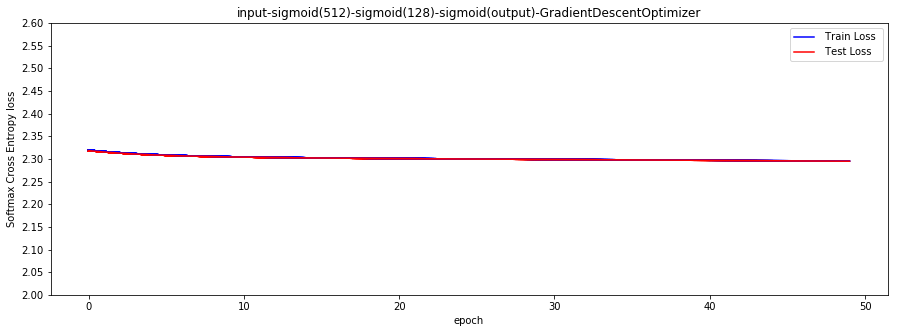

In [0]:
with tf.Session() as session :
  
    # We first have to create an operation to initialize the variables we created

    tf.global_variables_initializer().run()
    # Returns an Op that initializes global variables in the graph.
    
    fig, ax = plt.subplots( 1, 1, figsize=(15, 5) )
    ax.set_xlabel('epoch')
    ax.set_ylabel('Softmax Cross Entropy loss')
    
    xs, ytrs, ytes = [], [], []
    
    for epoch in range( epochs ):
        
        trAvgCost = 0. # Average Train Cost/ Loss
        teAvgCost = 0.
        tbatch = int( mnist.train.num_examples / batch ) # conisder it as mini batch
        # equals to no. of data points / batch

        # Loop over all batches
        for i in range( tbatch ):
          
            batchX, batchY = mnist.train.next_batch( batch )  # returns a minibatch of batch no. of xi's and yi's 
            
            # Here we use GradientDescentOptimizer
            # x, Y are the input parameters on which the models gets trained ( x, Y are placeholders )
            
            # Here c: corresponds to the parameter costSGD
            # w : correspondse to the parameter weightsSGD
            
            _, c, w = session.run( [ optimizerSGD, costSGD, weightsSGD ], feed_dict = { x: batchX, Y: batchY } )
            trAvgCost += c / tbatch
            
            c = session.run( costSGD, feed_dict = { x: mnist.test.images, Y: mnist.test.labels})
            teAvgCost += c / tbatch

        xs.append( epoch )
        ytrs.append( trAvgCost )
        ytes.append( teAvgCost )
        
        plot( xs, ytrs, ytes, ax, np.arange(1.3, 1.8, step=0.04), "input-sigmoid(512)-sigmoid(128)-sigmoid(output)-GradientDescentOptimizer")
        # plot( x, y, Y, ax, ticks, title )
        
        if epoch == step :  # step = 0
            print(" Epoch : ",(epoch + 1), " Train cost = {:.9f} ".format(trAvgCost), " Test cost = {:.9f} ".format(teAvgCost) )
            step += 4
            
    plot( xs, ytrs, ytes, ax, np.arange(2, 2.6, step=0.05), "input-sigmoid(512)-sigmoid(128)-sigmoid(output)-GradientDescentOptimizer")

    # We are calculating the final accuracy on the test data
    
    cPrediction = tf.equal( tf.argmax( ySGD, 1 ), tf.argmax( Y,1 ) )

    accuracy = tf.reduce_mean( tf.cast( cPrediction, tf.float32 ) )
    # tf.cast : Casts a tensor to a new type.

    print(" Accuracy : ", accuracy.eval( { x: mnist.test.images, Y: mnist.test.labels } ) * 100, ' % ')

From the plot we can see that SGD is much slower to converge than ADAM optimizer

And we didn't change the learning rate we kept it constant

Accuray of ADAM >>> Accuracy of SGD

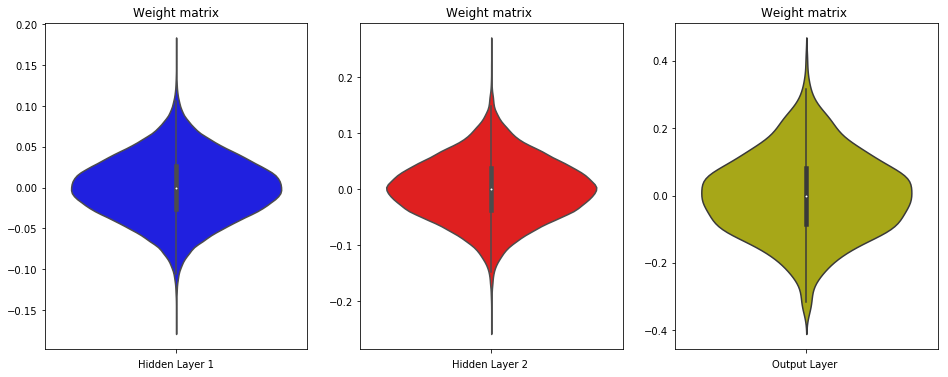

In [0]:
# Weight distriubtion at the end of training

import seaborn as sns

wh1 = w['h1'].flatten().reshape(-1,1)
wh2 = w['h2'].flatten().reshape(-1,1)
wout = w['out'].flatten().reshape(-1,1)


fig = plt.figure(figsize=(16,6))

plt.subplot(1, 3, 1)         
plt.title("Weight matrix")
ax = sns.violinplot( y = wh1, color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Weight matrix ")
ax = sns.violinplot( y = wh2, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Weight matrix ")
ax = sns.violinplot(y = wout,color='y')
plt.xlabel('Output Layer ')
plt.show()

From the weight distribution plot we can see that SGD weights are much smaller than ADAM weights

All the layers have median weight at 0

## Model 2 : RELU Activation

input (784) - ReLu(512) - ReLu(128) - sigmoid(output 10)

In [0]:
# Here weights is a  matrix, x is a vector and b is also a vector
# Hidden layer with Sigmoid activation

def MLPrelu( x, weights, biases ):
    
    print( ' x: ', x.get_shape(), ' W[h1]: ', weights['h1'].get_shape(), ' b[h1]: ', biases['b1'].get_shape() )        
    
  # Layer 1
    # ( x * weights['h1'] ) + biases['b1']   =>    ( w.T * x ) + b
    # Then we apply sigmoid on top of w.T * x + b

    layer1 = tf.add( tf.matmul( x, weights['h1'] ), biases['b1'] ) 
    layer1 = tf.nn.relu( layer1 )
    print(' layer1 : ', layer1.get_shape(), ' W[h2] : ', weights['h2'].get_shape(), ' b[h2] : ', biases['b2'].get_shape())        
    
  # Layer 2
    # ( layer1 * weights['h2'] ) + biases['b2']
    # Then we apply sigmoid on top of w.T * x + b

    layer2 = tf.add( tf.matmul( layer1, weights['h2'] ), biases['b2'] )  
    layer2 = tf.nn.relu(layer2)
    print(' layer2 : ', layer2.get_shape(), ' W[out] : ', weights['out'].get_shape(), ' b3 : ', biases['out'].get_shape())        
    
  # Output layer with Sigmoid activation
    # ( layer2 * weights['out'] ) + biases['out']  
    
    outlayer = tf.matmul( layer2, weights['out'] ) + biases['out']  
    outlayer = tf.nn.relu( outlayer )   # This sigmoid is softmax
    print(' outlayer : ', outlayer.get_shape())

    return outlayer
  
# Use tf.matmul instead of "*" because tf.matmul can change it's dimensions on the fly (broadcast)

# Ref :  https://leonardoaraujosantos.gitbooks.io/artificial-inteligence/content/multi_layer_perceptron_mnist.html


In [0]:
yRELU  = MLPrelu( x, weightsRELU, biases )  # SGD for sigmoid activation units

costRELU = tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits( logits = yRELU, labels = Y ))

# tf.reduce_mean computes the mean over all the examples in the batch.
# reduce_mean sums and averages all the values in the tensor 

# softmax_cross_entropy_with_logits : A Tensor that contains the softmax cross entropy loss. 

optimizerReluADAM = tf.train.AdamOptimizer( learning_rate = lr ).minimize( costRELU )
optimizerReluSGD  = tf.train.GradientDescentOptimizer( learning_rate = lr ).minimize( costRELU )

# means Training needs to be done with the optimizer defined which minimizes costRELU

# Ref : https://www.tensorflow.org/api_docs/python/tf/nn/softmax_cross_entropy_with_logits
# Ref : https://www.tensorflow.org/versions/r1.2/api_guides/python/train#Optimizers 

 x:  (?, 784)  W[h1]:  (784, 512)  b[h1]:  (512,)
 layer1 :  (?, 512)  W[h2] :  (512, 128)  b[h2] :  (128,)
 layer2 :  (?, 128)  W[out] :  (128, 10)  b3 :  (10,)
 outlayer :  (?, 10)
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



### Model 2 with ADAM optimizer

 Epoch :  1  Train cost = 0.942548905   Test cost = 0.914665262 
 Epoch :  5  Train cost = 0.531361010   Test cost = 0.566585649 
 Epoch :  9  Train cost = 0.514377809   Test cost = 0.571938535 
 Epoch :  13  Train cost = 0.511726119   Test cost = 0.575449676 
 Epoch :  17  Train cost = 0.506453734   Test cost = 0.581176666 
 Epoch :  21  Train cost = 0.505537272   Test cost = 0.586552426 
 Epoch :  25  Train cost = 0.503930535   Test cost = 0.582570947 
 Epoch :  29  Train cost = 0.504110416   Test cost = 0.581472620 
 Epoch :  33  Train cost = 0.502052906   Test cost = 0.587862381 
 Epoch :  37  Train cost = 0.503279593   Test cost = 0.595194964 
 Epoch :  41  Train cost = 0.504612135   Test cost = 0.604137158 
 Epoch :  45  Train cost = 0.506673615   Test cost = 0.609478660 
 Epoch :  49  Train cost = 0.503456484   Test cost = 0.612789055 
 Accuracy :  76.84999704360962  % 


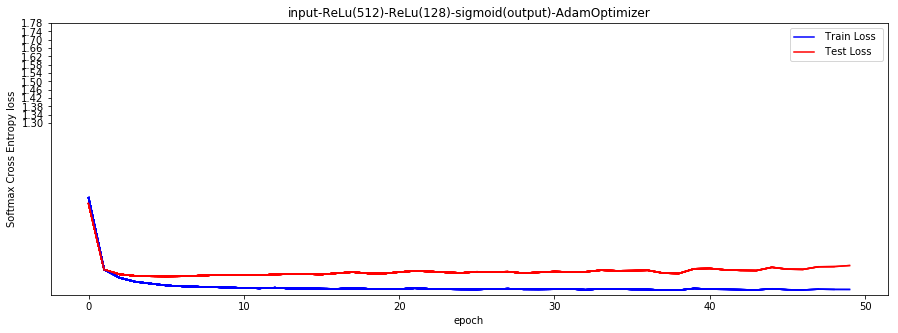

In [0]:
with tf.Session() as session :
  
    # We first have to create an operation to initialize the variables we created

    tf.global_variables_initializer().run()
    # Returns an Op that initializes global variables in the graph.
    
    fig, ax = plt.subplots( 1, 1, figsize=(15, 5) )
    ax.set_xlabel('epoch')
    ax.set_ylabel('Softmax Cross Entropy loss')
    
    xs, ytrs, ytes = [], [], []
    
    for epoch in range( epochs ):
        
        trAvgCost = 0. # Average Train Cost/ Loss
        teAvgCost = 0.
        tbatch = int( mnist.train.num_examples / batch ) # conisder it as mini batch
        # equals to no. of data points / batch

        # Loop over all batches
        for i in range( tbatch ):
          
            batchX, batchY = mnist.train.next_batch( batch )  # returns a minibatch of batch no. of xi's and yi's 
            
            # Here we use AdamOptimizer
            # x, Y are the input parameters on which the models gets trained ( x, Y are placeholders )
            
            # Here c: corresponds to the parameter costSGD
            # w : correspondse to the parameter weightsSGD
            
            _, c, w = session.run( [ optimizerReluADAM, costRELU, weightsRELU ], feed_dict = { x: batchX, Y: batchY } )
            trAvgCost += c / tbatch
            
            c = session.run( costRELU, feed_dict = { x: mnist.test.images, Y: mnist.test.labels})
            teAvgCost += c / tbatch
            
            # session.run() : returns parameter values based on the input parameters
            # feed_dict: A dictionary that maps Tensor objects to feed values. 

            # c = session.run() : return the cost after every bath during train
            # w = session.run() : return the weights that are modified after every batch through Back propagation
            
            # w is dict w = {'h1': updated h1 weight vector after the current batch,
            #                'h2': updated h2 weight vector after the current batch, 
            #                'out': updated output weight vector after the current batch, 
            #                }
            # you check these w matrix for every iteration, and check whats happening during back prop
    

        xs.append( epoch )
        ytrs.append( trAvgCost )
        ytes.append( teAvgCost )
        
        plot( xs, ytrs, ytes, ax, np.arange(0.3, 1.8, step=0.04), "input-ReLu(512)-ReLu(128)-sigmoid(output)-AdamOptimizer")
        # plot( x, y, Y, ax, ticks, title )
        
        if epoch == step :  # step = 0
            print(" Epoch : ",(epoch + 1), " Train cost = {:.9f} ".format(trAvgCost), " Test cost = {:.9f} ".format(teAvgCost) )
            step += 4
    plot( xs, ytrs, ytes, ax, np.arange(0.3, 1.8, step=0.04), "input-ReLu(512)-ReLu(128)-sigmoid(output)-AdamOptimizer")

    # We are calculating the final accuracy on the test data
    
    cPrediction = tf.equal( tf.argmax( yRELU, 1 ), tf.argmax( Y,1 ) )
    # tf.argmax(input, axis=None, name=None, dimension=None) : Returns the index with the largest value across axis of a tensor.

    # Finding the max value in 10 dim  vec <0,1----9> and checking if both hav the same index
    # For ex: y1 = < 0.3, 0.1, 0.8, 0.2, 0.3, 0.1, 0.4, 0.1, 0.3, 0.4 >  i,e; label 2
    #     and Y1 = < 0.3, 0.1, 0.8, 0.2, 0.3, 0.1, 0.4, 0.1, 0.3, 0.4 >  i,e; label 2
    # That means we have a correct prediction

    accuracy = tf.reduce_mean( tf.cast( cPrediction, tf.float32 ) )
    # tf.cast : Casts a tensor to a new type.
    # The operation casts x (in case of Tensor) or x.values (in case of SparseTensor) to dtype.

    print(" Accuracy : ", accuracy.eval( { x: mnist.test.images, Y: mnist.test.labels } ) * 100, ' % ')
    
    
# _, c, w = session.run( [ optimizerADAM , costSGD, weightsSGD ] ) : it returns three parameters
# _, c = session.run( [ optimizerADAM, costSGD ] )                 : it returns two parameters
# _ = session.run( [ optimizerADAM ] )                             : it returns one paramter (for the input optimizer it return none)
# c = session.run( [ costSGD ] )                                   : it returns one paramter (for the input cost return error after the batch)

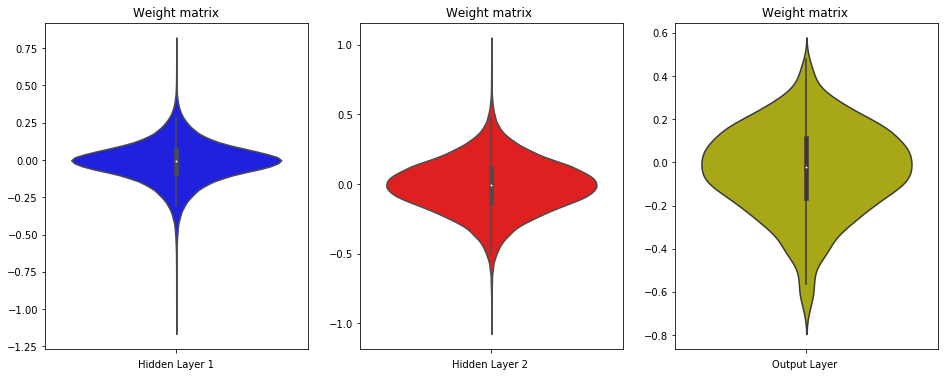

In [0]:
# Weight distriubtion at the end of training

import seaborn as sns

wh1 = w['h1'].flatten().reshape(-1,1)
wh2 = w['h2'].flatten().reshape(-1,1)
wout = w['out'].flatten().reshape(-1,1)


fig = plt.figure(figsize=(16,6))

plt.subplot(1, 3, 1)         
plt.title("Weight matrix")
ax = sns.violinplot( y = wh1, color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Weight matrix ")
ax = sns.violinplot( y = wh2, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Weight matrix ")
ax = sns.violinplot(y = wout,color='y')
plt.xlabel('Output Layer ')
plt.show()

### Model 2 with SGD 

 Epoch :  1  Train cost = 2.058628203   Test cost = 2.041590202 
 Epoch :  5  Train cost = 1.306782135   Test cost = 1.299540757 
 Epoch :  9  Train cost = 1.064154098   Test cost = 1.051201288 
 Epoch :  13  Train cost = 1.004424324   Test cost = 0.994374263 
 Epoch :  17  Train cost = 0.973702249   Test cost = 0.965160182 
 Epoch :  21  Train cost = 0.953727452   Test cost = 0.946633203 
 Epoch :  25  Train cost = 0.939307528   Test cost = 0.933041747 
 Epoch :  29  Train cost = 0.928018282   Test cost = 0.922716077 
 Epoch :  33  Train cost = 0.918721944   Test cost = 0.913950585 
 Epoch :  37  Train cost = 0.783474629   Test cost = 0.779906539 
 Epoch :  41  Train cost = 0.753156252   Test cost = 0.747680622 
 Epoch :  45  Train cost = 0.737360458   Test cost = 0.732311907 
 Epoch :  49  Train cost = 0.725509900   Test cost = 0.721023624 
 Accuracy :  74.50000047683716  % 


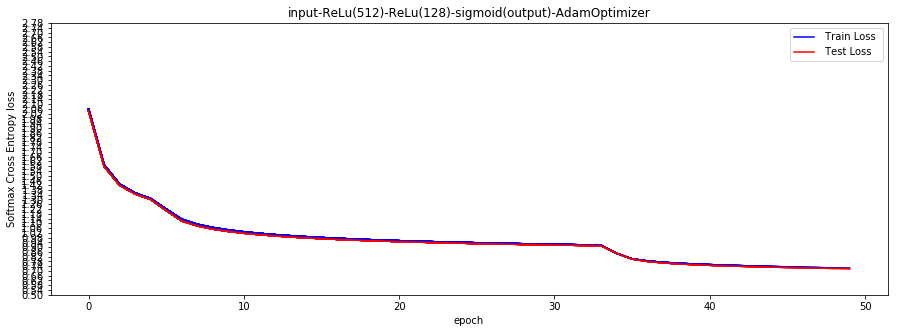

In [0]:
with tf.Session() as session :
  
    # We first have to create an operation to initialize the variables we created

    tf.global_variables_initializer().run()
    # Returns an Op that initializes global variables in the graph.
    
    fig, ax = plt.subplots( 1, 1, figsize=(15, 5) )
    ax.set_xlabel('epoch')
    ax.set_ylabel('Softmax Cross Entropy loss')
    
    xs, ytrs, ytes = [], [], []
    
    for epoch in range( epochs ):
        
        trAvgCost = 0. # Average Train Cost/ Loss
        teAvgCost = 0.
        tbatch = int( mnist.train.num_examples / batch ) # conisder it as mini batch
        # equals to no. of data points / batch

        # Loop over all batches
        for i in range( tbatch ):
          
            batchX, batchY = mnist.train.next_batch( batch )  # returns a minibatch of batch no. of xi's and yi's 
            
            # Here we use GradientDescentOptimizer
            # x, Y are the input parameters on which the models gets trained ( x, Y are placeholders )
            
            # Here c: corresponds to the parameter costSGD
            # w : correspondse to the parameter weightsSGD
            
            _, c, w = session.run( [ optimizerReluSGD, costRELU, weightsRELU ], feed_dict = { x: batchX, Y: batchY } )
            trAvgCost += c / tbatch
            
            c = session.run( costRELU, feed_dict = { x: mnist.test.images, Y: mnist.test.labels})
            teAvgCost += c / tbatch
            
            # session.run() : returns parameter values based on the input parameters
            # feed_dict: A dictionary that maps Tensor objects to feed values. 

            

        xs.append( epoch )
        ytrs.append( trAvgCost )
        ytes.append( teAvgCost )
        
        plot( xs, ytrs, ytes, ax, np.arange(0.5, 2.8, step=0.08), "input-ReLu(512)-ReLu(128)-sigmoid(output)-AdamOptimizer")
        # plot( x, y, Y, ax, ticks, title )
        
        if epoch == step :  # step = 0
            print(" Epoch : ",(epoch + 1), " Train cost = {:.9f} ".format(trAvgCost), " Test cost = {:.9f} ".format(teAvgCost) )
            step += 4
    plot( xs, ytrs, ytes, ax, np.arange(0.5, 2.8, step=0.08), "input-ReLu(512)-ReLu(128)-sigmoid(output)-AdamOptimizer")

    # We are calculating the final accuracy on the test data
    
    cPrediction = tf.equal( tf.argmax( yRELU, 1 ), tf.argmax( Y,1 ) )
    # tf.argmax(input, axis=None, name=None, dimension=None) : Returns the index with the largest value across axis of a tensor.

    # Finding the max value in 10 dim  vec <0,1----9> and checking if both hav the same index
    # For ex: y1 = < 0.3, 0.1, 0.8, 0.2, 0.3, 0.1, 0.4, 0.1, 0.3, 0.4 >  i,e; label 2
    #     and Y1 = < 0.3, 0.1, 0.8, 0.2, 0.3, 0.1, 0.4, 0.1, 0.3, 0.4 >  i,e; label 2
    # That means we have a correct prediction

    accuracy = tf.reduce_mean( tf.cast( cPrediction, tf.float32 ) )
    # tf.cast : Casts a tensor to a new type.
    # The operation casts x (in case of Tensor) or x.values (in case of SparseTensor) to dtype.

    print(" Accuracy : ", accuracy.eval( { x: mnist.test.images, Y: mnist.test.labels } ) * 100, ' % ')

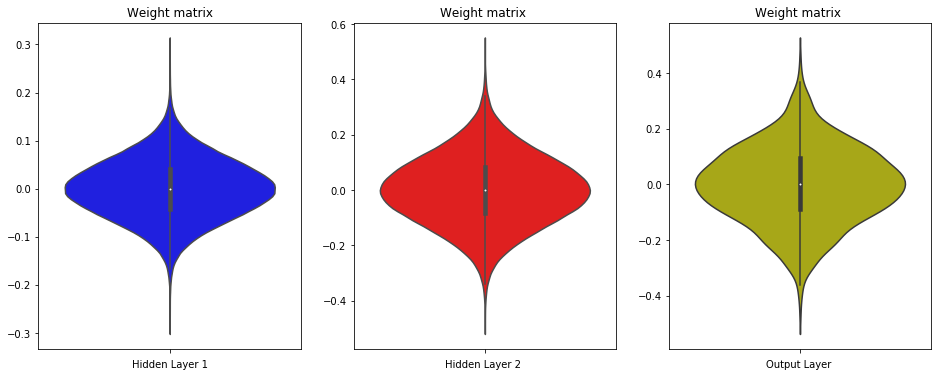

In [0]:
# Weight distriubtion at the end of training

import seaborn as sns

wh1 = w['h1'].flatten().reshape(-1,1)
wh2 = w['h2'].flatten().reshape(-1,1)
wout = w['out'].flatten().reshape(-1,1)


fig = plt.figure(figsize=(16,6))

plt.subplot(1, 3, 1)         
plt.title("Weight matrix")
ax = sns.violinplot( y = wh1, color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Weight matrix ")
ax = sns.violinplot( y = wh2, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Weight matrix ")
ax = sns.violinplot(y = wout,color='y')
plt.xlabel('Output Layer ')
plt.show()

## Model 3 : Batch Normalization

Input(784) - Sigmoid(BatchNormalization(512)) - Sigmoid(BatchNormalization(128))- Sigmoid(output 10)

In [0]:
# Here weights is a  matrix, x is a vector and b is also a vector
# Hidden layer with Sigmoid activation

# Here we do not batch normalize 'x' but we normalize 'z' ( z = w.T * x + b )
# w.T * x + b = z -> ( Batch Normalization ) -> ( Sigmoid Acti )

epsilon = 1e-3

def MLPbatchN( x, weights, biases ):
    
    print( ' x: ', x.get_shape(), ' W[h1]: ', weights['h1'].get_shape(), ' b[h1]: ', biases['b1'].get_shape() )        
    
  # Layer 1
    # x * weights['h1'] + biases['b1']   =>    ( w.T * x ) + b
    # Then we apply sigmoid on top of w.T * x + b

    layer1 = tf.add( tf.matmul( x, weights['h1'] ), biases['b1'] ) 
    
    # Calculate the mean and variance of x for Batch Normalization
    
    batchMean1, batchVar1 = tf.nn.moments( layer1, [0] )
    # tf.nn.moments : Calculate the mean and variance of x ( Here x = layer1 )
    # for simple batch normalization pass axes=[0] (batch only) ( Here axes = [0])
    
    scale1 = tf.Variable( tf.ones( [ hidden1 ] ))
    beta1 = tf.Variable( tf.zeros( [ hidden1 ] ))
    
    layer1 = tf.nn.batch_normalization( layer1, batchMean1, batchVar1, beta1, scale1, epsilon )
    # tf.nn.batch_normalization : Returns the normalized, scaled, offset tensor.
    # tf.nn.batch_normalization( x, mean, variance, offset, scale, variance_epsilon, name=None )
    
    layer1 = tf.nn.sigmoid( layer1 )
    print(' layer1 : ', layer1.get_shape(), ' W[h2] : ', weights['h2'].get_shape(), ' b[h2] : ', biases['b2'].get_shape())        
    
  # Layer 2
    # ( layer1 * weights['h2'] ) + biases['b2'] => Then we apply sigmoid on top of w.T * x + b

    layer2 = tf.add( tf.matmul( layer1, weights['h2'] ), biases['b2'] )  
    
    # Calculate the mean and variance of x for Batch Normalization
    
    batchMean2, batchVar2 = tf.nn.moments( layer2, [0] )
    # tf.nn.moments : Calculate the mean and variance of x ( Here x = layer1 )
    # for simple batch normalization pass axes=[0] (batch only) ( Here axes = [0])
    
    scale2 = tf.Variable( tf.ones( [ hidden2 ] ))
    beta2 = tf.Variable( tf.zeros( [ hidden2 ] ))
    
    layer2 = tf.nn.batch_normalization( layer2, batchMean2, batchVar2, beta2, scale2, epsilon )
    # tf.nn.batch_normalization : Returns the normalized, scaled, offset tensor.
    # tf.nn.batch_normalization( x, mean, variance, offset, scale, variance_epsilon, name=None )
    
    layer2 = tf.nn.sigmoid(layer2)
    print(' layer2 : ', layer2.get_shape(), ' W[out] : ', weights['out'].get_shape(), ' b3 : ', biases['out'].get_shape())        
    
    
  # Output layer with Sigmoid activation
    # ( layer2 * weights['out'] ) + biases['out']  
    
    outlayer = tf.matmul( layer2, weights['out'] ) + biases['out']  
    outlayer = tf.nn.sigmoid( outlayer )   # This sigmoid is softmax
    print(' outlayer : ', outlayer.get_shape())

    return outlayer
  
# Use tf.matmul instead of "*" because tf.matmul can change it's dimensions on the fly (broadcast)

# Ref : https://r2rt.com/implementing-batch-normalization-in-tensorflow.html
# Ref : https://www.tensorflow.org/api_docs/python/tf/nn/batch_normalization

In [0]:
yBatch  = MLPbatchN( x, weightsSGD, biases )  # SGD for sigmoid activation units

costBatch = tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits( logits = yBatch, labels = Y ))

# tf.reduce_mean computes the mean over all the examples in the batch.
# reduce_mean sums and averages all the values in the tensor 

# softmax_cross_entropy_with_logits : A Tensor that contains the softmax cross entropy loss. 

optimizerADAM = tf.train.AdamOptimizer( learning_rate = lr ).minimize( costBatch )
optimizerSGD  = tf.train.GradientDescentOptimizer( learning_rate = lr ).minimize( costBatch )

# means Training needs to be done with the optimizer defined which minimizes costSGD

# Ref : https://www.tensorflow.org/api_docs/python/tf/nn/softmax_cross_entropy_with_logits
# Ref : https://www.tensorflow.org/versions/r1.2/api_guides/python/train#Optimizers 

 x:  (?, 784)  W[h1]:  (784, 512)  b[h1]:  (512,)
 layer1 :  (?, 512)  W[h2] :  (512, 128)  b[h2] :  (128,)
 layer2 :  (?, 128)  W[out] :  (128, 10)  b3 :  (10,)
 outlayer :  (?, 10)
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

Instructions for updating:
Use tf.cast instead.


### Model 3 with ADAM 

 Epoch :  1  Train cost = 1.697349047   Test cost = 1.689279851 
 Epoch :  5  Train cost = 1.491634058   Test cost = 1.495500793 
 Epoch :  9  Train cost = 1.476616930   Test cost = 1.484668698 
 Epoch :  13  Train cost = 1.471616056   Test cost = 1.481558877 
 Epoch :  17  Train cost = 1.468300072   Test cost = 1.480401682 
 Epoch :  21  Train cost = 1.466701727   Test cost = 1.480095519 
 Epoch :  25  Train cost = 1.465339217   Test cost = 1.478960555 
 Epoch :  29  Train cost = 1.464544551   Test cost = 1.479214200 
 Epoch :  33  Train cost = 1.464115842   Test cost = 1.479016660 
 Epoch :  37  Train cost = 1.463985386   Test cost = 1.478876654 
 Epoch :  41  Train cost = 1.463681896   Test cost = 1.478569030 
 Epoch :  45  Train cost = 1.463328040   Test cost = 1.478140596 
 Epoch :  49  Train cost = 1.463228292   Test cost = 1.478144705 
 Accuracy :  98.07999730110168  % 


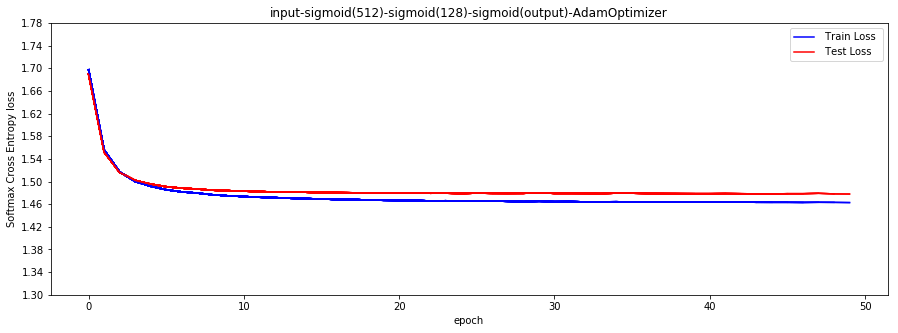

In [0]:
with tf.Session() as session :
  
    # We first have to create an operation to initialize the variables we created

    tf.global_variables_initializer().run()
    # Returns an Op that initializes global variables in the graph.
    
    fig, ax = plt.subplots( 1, 1, figsize=(15, 5) )
    ax.set_xlabel('epoch')
    ax.set_ylabel('Softmax Cross Entropy loss')
    
    xs, ytrs, ytes = [], [], []
    
    for epoch in range( epochs ):
        
        trAvgCost = 0. # Average Train Cost/ Loss
        teAvgCost = 0.
        tbatch = int( mnist.train.num_examples / batch ) # conisder it as mini batch
        # equals to no. of data points / batch

        # Loop over all batches
        for i in range( tbatch ):
          
            batchX, batchY = mnist.train.next_batch( batch )  # returns a minibatch of batch no. of xi's and yi's 
            
            # Here we use AdamOptimizer
            # x, Y are the input parameters on which the models gets trained ( x, Y are placeholders )
            
            _, c, w = session.run( [ optimizerADAM, costBatch, weightsSGD ], feed_dict = { x: batchX, Y: batchY } )
            trAvgCost += c / tbatch
            
            c = session.run( costBatch, feed_dict = { x: mnist.test.images, Y: mnist.test.labels})
            teAvgCost += c / tbatch

        xs.append( epoch )
        ytrs.append( trAvgCost )
        ytes.append( teAvgCost )
        
        plot( xs, ytrs, ytes, ax, np.arange(1.3, 1.8, step=0.04), "input-sigmoid(512)-sigmoid(128)-sigmoid(output)-AdamOptimizer")
        # plot( x, y, Y, ax, ticks, title )
        
        if epoch == step :  # step = 0
            print(" Epoch : ",(epoch + 1), " Train cost = {:.9f} ".format(trAvgCost), " Test cost = {:.9f} ".format(teAvgCost) )
            step += 4
    plot( xs, ytrs, ytes, ax, np.arange(1.3, 1.8, step=0.04), "input-sigmoid(512)-sigmoid(128)-sigmoid(output)-AdamOptimizer")

    # We are calculating the final accuracy on the test data
    
    cPrediction = tf.equal( tf.argmax( yBatch, 1 ), tf.argmax( Y,1 ) )
    # tf.argmax(input, axis=None, name=None, dimension=None) : Returns the index with the largest value across axis of a tensor.

    accuracy = tf.reduce_mean( tf.cast( cPrediction, tf.float32 ) )
    # tf.cast : Casts a tensor to a new type.
    # The operation casts x (in case of Tensor) or x.values (in case of SparseTensor) to dtype.

    print(" Accuracy : ", accuracy.eval( { x: mnist.test.images, Y: mnist.test.labels } ) * 100, ' % ')
    

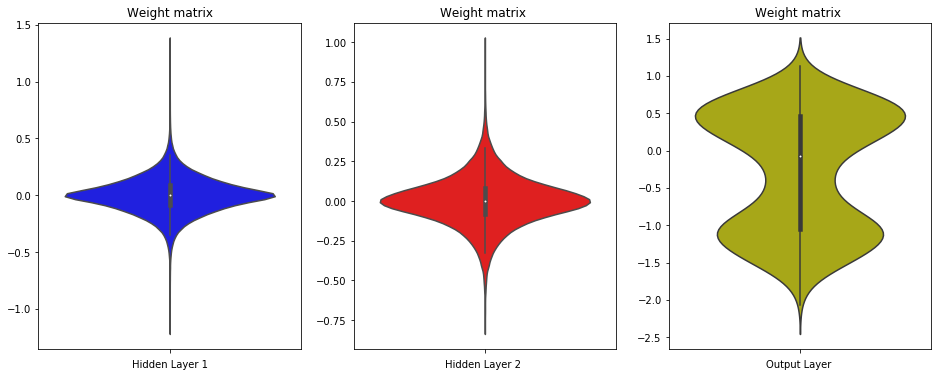

In [0]:
# Weight distriubtion at the end of training

import seaborn as sns

wh1 = w['h1'].flatten().reshape(-1,1)
wh2 = w['h2'].flatten().reshape(-1,1)
wout = w['out'].flatten().reshape(-1,1)


fig = plt.figure(figsize=(16,6))

plt.subplot(1, 3, 1)         
plt.title("Weight matrix")
ax = sns.violinplot( y = wh1, color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Weight matrix ")
ax = sns.violinplot( y = wh2, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Weight matrix ")
ax = sns.violinplot(y = wout,color='y')
plt.xlabel('Output Layer ')
plt.show()

## Model 4 Dropout

Input(784)  -  ReLu(512) - Dropout - ReLu(128)- Dropout -Sigmoid(output 10 )

In [0]:
keepProb = tf.placeholder( tf.float32 )
# keepProbTr: we will be using these placeholders when we use dropouts, while training model

keepProbTe = tf.placeholder( tf.float32 )
# keepProbTe: we will be using these placeholders when we use dropouts, while testing model

In [0]:
# Here weights is a  matrix, x is a vector and b is also a vector
# Hidden layer with Sigmoid activation



def MLPdrop( x, weights, biases ):
    
    print( ' x: ', x.get_shape(), ' W[h1]: ', weights['h1'].get_shape(), ' b[h1]: ', biases['b1'].get_shape() )        
    
  # Layer 1
    # x * weights['h1'] + biases['b1']   =>    ( w.T * x ) + b
    # Then we apply sigmoid on top of w.T * x + b

    layer1 = tf.add( tf.matmul( x, weights['h1'] ), biases['b1'] ) 
    layer1 = tf.nn.relu( layer1 )
    print(' layer1 : ', layer1.get_shape(), ' W[h2] : ', weights['h2'].get_shape(), ' b[h2] : ', biases['b2'].get_shape())        
    
    layer1Drop = tf.nn.dropout(layer1, keepProb)
    # tf.nn.dropout( x, keep_prob )  Returns A Tensor of the same shape of x.


  # Layer 2
    # ( layer1 * weights['h2'] ) + biases['b2'] => Then we apply sigmoid on top of w.T * x + b

    layer2 = tf.add( tf.matmul( layer1Drop, weights['h2'] ), biases['b2'] )  
    layer2 = tf.nn.relu(layer2)
    print(' layer2 : ', layer2.get_shape(), ' W[out] : ', weights['out'].get_shape(), ' b3 : ', biases['out'].get_shape())        
    
    layer2Drop = tf.nn.dropout(layer2, keepProb)

    
  # Output layer with Sigmoid activation
    # ( layer2 * weights['out'] ) + biases['out']  
    
    outlayer = tf.matmul( layer2Drop, weights['out'] ) + biases['out']  
    outlayer = tf.nn.relu( outlayer )   # This sigmoid is softmax
    print(' outlayer : ', outlayer.get_shape())

    return outlayer
  
# Use tf.matmul instead of "*" because tf.matmul can change it's dimensions on the fly (broadcast)



In [0]:
yDrop  = MLPdrop( x, weightsSGD, biases )  # SGD for sigmoid activation units

costDrop = tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits( logits = yDrop, labels = Y ))

# tf.reduce_mean computes the mean over all the examples in the batch.
# reduce_mean sums and averages all the values in the tensor 

# softmax_cross_entropy_with_logits : A Tensor that contains the softmax cross entropy loss. 

optimizerADAM = tf.train.AdamOptimizer( learning_rate = lr ).minimize( costDrop )
optimizerSGD  = tf.train.GradientDescentOptimizer( learning_rate = lr ).minimize( costDrop )

# means Training needs to be done with the optimizer defined which minimizes costSGD

# Ref : https://www.tensorflow.org/api_docs/python/tf/nn/softmax_cross_entropy_with_logits
# Ref : https://www.tensorflow.org/versions/r1.2/api_guides/python/train#Optimizers 

 x:  (?, 784)  W[h1]:  (784, 512)  b[h1]:  (512,)
 layer1 :  (?, 512)  W[h2] :  (512, 128)  b[h2] :  (128,)
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
 layer2 :  (?, 128)  W[out] :  (128, 10)  b3 :  (10,)
 outlayer :  (?, 10)
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



 Epoch :  1  Train cost = 0.885372685   Test cost = 0.712101786 
 Epoch :  5  Train cost = 0.145206238   Test cost = 0.092552088 
 Epoch :  9  Train cost = 0.102534734   Test cost = 0.077704700 
 Epoch :  13  Train cost = 0.083682614   Test cost = 0.069109013 
 Epoch :  17  Train cost = 0.068781611   Test cost = 0.068647487 
 Epoch :  21  Train cost = 0.061099538   Test cost = 0.068255457 
 Epoch :  25  Train cost = 0.052469611   Test cost = 0.071142431 
 Epoch :  29  Train cost = 0.054446998   Test cost = 0.073443709 
 Epoch :  33  Train cost = 0.049386542   Test cost = 0.073175868 
 Epoch :  37  Train cost = 0.043463502   Test cost = 0.074501939 
 Epoch :  41  Train cost = 0.041837052   Test cost = 0.080020624 
 Epoch :  45  Train cost = 0.038690401   Test cost = 0.080428055 
 Epoch :  49  Train cost = 0.042164966   Test cost = 0.080804167 
 Accuracy :  98.25000166893005  % 


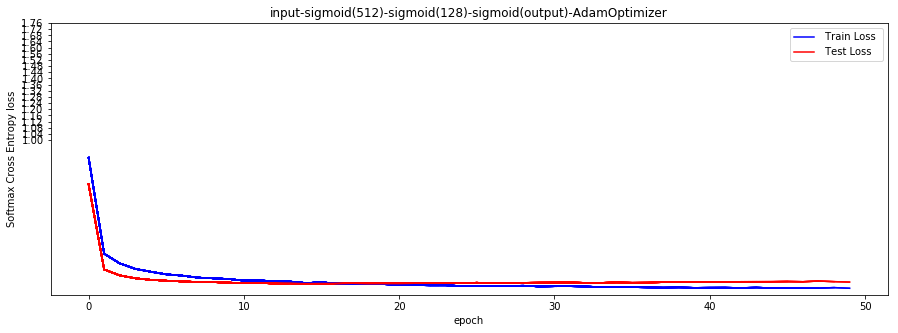

In [0]:
with tf.Session() as session :
  
    # We first have to create an operation to initialize the variables we created

    tf.global_variables_initializer().run()
    # Returns an Op that initializes global variables in the graph.
    
    fig, ax = plt.subplots( 1, 1, figsize=(15, 5) )
    ax.set_xlabel('epoch')
    ax.set_ylabel('Softmax Cross Entropy loss')
    
    xs, ytrs, ytes = [], [], []
    
    for epoch in range( epochs ):
        
        trAvgCost = 0. # Average Train Cost/ Loss
        teAvgCost = 0.
        tbatch = int( mnist.train.num_examples / batch ) # conisder it as mini batch
        # equals to no. of data points / batch

        # Loop over all batches
        for i in range( tbatch ):
          
            batchX, batchY = mnist.train.next_batch( batch )  # returns a minibatch of batch no. of xi's and yi's 
            
            # Here we use AdamOptimizer
            # x, Y are the input parameters on which the models gets trained ( x, Y are placeholders )
            
            _, c, w = session.run( [ optimizerADAM, costDrop, weightsSGD ], feed_dict = { x: batchX, Y: batchY,  keepProb: 0.5 } )
            trAvgCost += c / tbatch
            
            c = session.run( costDrop, feed_dict = { x: mnist.test.images, Y: mnist.test.labels, keepProb: 1.0 } )
            teAvgCost += c / tbatch

        xs.append( epoch )
        ytrs.append( trAvgCost )
        ytes.append( teAvgCost )
        
        plot( xs, ytrs, ytes, ax, np.arange(1, 1.8, step=0.04), "input-sigmoid(512)-sigmoid(128)-sigmoid(output)-AdamOptimizer")
        # plot( x, y, Y, ax, ticks, title )
        
        if epoch == step :  # step = 0
            print(" Epoch : ",(epoch + 1), " Train cost = {:.9f} ".format(trAvgCost), " Test cost = {:.9f} ".format(teAvgCost) )
            step += 4
    plot( xs, ytrs, ytes, ax, np.arange(1, 1.8, step=0.04), "input-sigmoid(512)-sigmoid(128)-sigmoid(output)-AdamOptimizer")

    # We are calculating the final accuracy on the test data
    
    cPrediction = tf.equal( tf.argmax( yDrop, 1 ), tf.argmax( Y,1 ) )
    # tf.argmax(input, axis=None, name=None, dimension=None) : Returns the index with the largest value across axis of a tensor.

    accuracy = tf.reduce_mean( tf.cast( cPrediction, tf.float32 ) )
    # tf.cast : Casts a tensor to a new type.
    # The operation casts x (in case of Tensor) or x.values (in case of SparseTensor) to dtype.

    print(" Accuracy : ", accuracy.eval( { x: mnist.test.images, Y: mnist.test.labels, keepProb: 1.0 } ) * 100, ' % ')
    

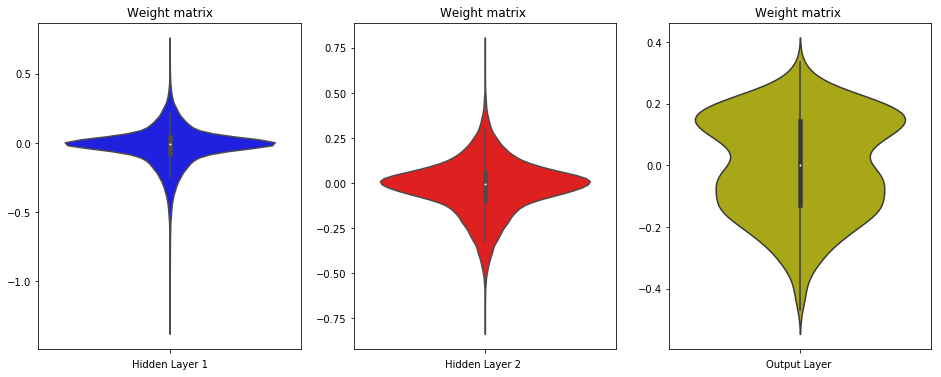

In [0]:
# Weight distriubtion at the end of training

import seaborn as sns

wh1 = w['h1'].flatten().reshape(-1,1)
wh2 = w['h2'].flatten().reshape(-1,1)
wout = w['out'].flatten().reshape(-1,1)


fig = plt.figure(figsize=(16,6))

plt.subplot(1, 3, 1)         
plt.title("Weight matrix")
ax = sns.violinplot( y = wh1, color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Weight matrix ")
ax = sns.violinplot( y = wh2, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Weight matrix ")
ax = sns.violinplot(y = wout,color='y')
plt.xlabel('Output Layer ')
plt.show()